In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense, Flatten
from keras.utils import to_categorical


In [10]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # Reshape for CNN input
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [15]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 159s 106ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.0661 - val_accuracy: 0.9896
Epoch 2/10
1500/1500 [==============================] - 143s 95ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0613 - val_accuracy: 0.9897
Epoch 3/10
1500/1500 [==============================] - 148s 99ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0661 - val_accuracy: 0.9882
Epoch 4/10
1500/1500 [==============================] - 160s 107ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.0634 - val_accuracy: 0.9898
Epoch 5/10
1500/1500 [==============================] - 165s 110ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0664 - val_accuracy: 0.9891
Epoch 6/10
1500/1500 [==============================] - 176s 117ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0757 - val_accuracy: 0.9896
Epoch 7/10
1500/1500 [==============================] - 168s 112ms/step - loss: 0.0040 - accuracy: 0.9987 - val_lo

In [19]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")




313/313 [==============================] - 10s 32ms/step - loss: 0.0837 - accuracy: 0.9885
Test loss: 0.0837, Test accuracy: 0.9885


In [20]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)


313/313 [==============================] - 9s 30ms/step


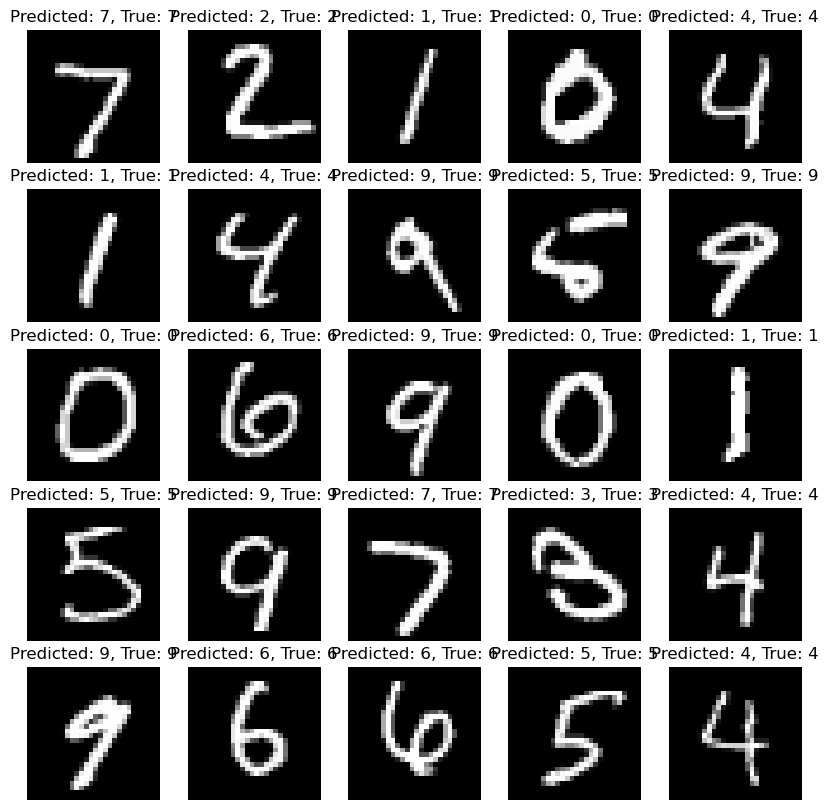

In [21]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, True: {np.argmax(y_test[i])}")
    plt.axis('off')
plt.show()
